##### importamos la librería necesaria

tengo que forzar la instalacion de la libreria para levantar data de arduino en la sesión de jupyter notebook que estoy instanciando, si no lo tengo instalado


In [1]:
import sys
!{sys.executable} -m pip install pyserial


In [2]:
import serial #para leer la data del arduino uno
import pandas as pd #para volcar esta data en un dataframe y poder trabajarla
import time #para poder loggear el tiempo
import matplotlib.pyplot as plt

In [3]:
puerto_arduino = 'COM8' #el puerto que encontramos con el .ino que te devuelve en que puerto esta
baud = 9600 #esta es la velocidad de comunicación entre la compu y el arduino
nombrearchivo = 'arduino_output.csv' #el nombre del archivo que voy a devolver
muestras = 400 #cantidad de datos
nombrecolumnas = False # para setear si quiero guardar el nombre de la columna

In [4]:
arduino = serial.Serial(port=puerto_arduino, baudrate=baud) 
print('Conectado exitosamente al puerto:' +puerto_arduino)

Conectado exitosamente al puerto:COM8


In [5]:
archivo = open(nombrearchivo,'w')
print('Archivo creado')

Archivo creado


In [6]:
linea = 0 
while linea <= muestras:
    if nombrecolumnas:
        if linea == 0:
            print('guardando nombre de columnas')
        else:
            print('linea: ' + str(linea) + ' : guardando...' )
    getData = str(arduino.readline())
    #print(getData)
    data = getData[2:][:-5]
    print(data)

    archivo = open(nombrearchivo,'a') # 'a' viene de append, es decir, agregar data
    archivo.write(data+'\n') #nuevo renglon
    linea = linea + 1
print('fin de toma de datos!')


0.00,12
0.00,17
0.00,23
0.00,28
0.00,33
0.00,39
0.00,43
0.00,48
0.01,78
0.02,149
0.03,222
0.04,287
0.05,347
0.06,400
0.07,450
0.08,495
0.09,537
0.10,574
0.11,609
0.12,640
0.13,670
0.14,696
0.15,721
0.16,743
0.17,764
0.18,784
0.19,800
0.20,817
0.21,832
0.22,846
0.23,858
0.25,871
0.26,881
0.27,893
0.28,901
0.29,911
0.30,917
0.31,926
0.32,931
0.33,939
0.34,943
0.35,950
0.36,954
0.37,959
0.38,962
0.39,968
0.40,970
0.41,974
0.42,978
0.43,980
0.44,983
0.45,985
0.46,988
0.47,990
0.48,993
0.50,994
0.50,996
0.52,997
0.53,1000
0.54,1000
0.55,1003
0.56,1002
0.57,1005
0.58,1006
0.59,1006
0.61,1009
0.62,1008
0.63,1010
0.64,1010
0.65,1011
0.66,1012
0.67,1011
0.69,1014
0.70,1012
0.71,1014
0.72,1014
0.73,1015
0.74,1015
0.75,1014
0.77,1003
0.78,905
0.79,829
0.80,758
0.81,696
0.82,638
0.83,587
0.84,539
0.85,495
0.86,456
0.87,419
0.88,386
0.89,356
0.90,328
0.91,302
0.92,278
0.93,256
0.94,237
0.95,219
0.96,202
0.98,186
0.99,172
1.00,159
1.01,147
1.02,136
1.03,126
1.04,116
1.05,108
1.06,100
1.07,92
1.08,86

In [7]:
df = pd.read_csv('arduino_output.csv')

In [8]:
df.columns = ['t','bit']

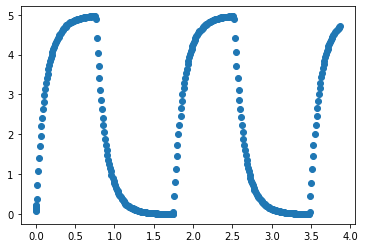

In [11]:
scatter = plt.scatter(x = df['t'],y = df['bit']* 5/1023 )
plt.show(scatter)